In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
columns = ['letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar',
           'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

In [ ]:
df = pd.read_csv("letter-recognition.data", names=columns, sep = ",")
df.head()

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [ ]:
df['letter']

,letter
0,T
1,I
2,D
3,N
4,G
...,...
19995,D
19996,C
19997,T
19998,S


In [ ]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [ ]:
X

array([[ 2,  8,  3, ...,  8,  0,  8],
       [ 5, 12,  3, ...,  8,  4, 10],
       [ 4, 11,  6, ...,  7,  3,  9],
       ...,
       [ 6,  9,  6, ..., 12,  2,  4],
       [ 2,  3,  4, ...,  9,  5,  8],
       [ 4,  9,  6, ...,  7,  2,  8]])

In [ ]:
y

array(['T', 'I', 'D', ..., 'T', 'S', 'A'], dtype=object)

In [ ]:
# Encode letters to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Dense(128, input_shape=(16,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(26, activation='softmax')  # 26 classes for A–Z
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2811 - loss: 2.7035 - val_accuracy: 0.6750 - val_loss: 1.2221
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6857 - loss: 1.1407 - val_accuracy: 0.7387 - val_loss: 0.9474
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7473 - loss: 0.9156 - val_accuracy: 0.7765 - val_loss: 0.7940
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7814 - loss: 0.7667 - val_accuracy: 0.7860 - val_loss: 0.7091
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8038 - loss: 0.6894 - val_accuracy: 0.8220 - val_loss: 0.6273
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8227 - loss: 0.6213 - val_accuracy: 0.8278 - val_loss: 0.5911
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8374 - loss: 0.5628 - val_accuracy: 0.8453 - val_loss: 0.5245
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8454 - loss: 0.5243 - val_accuracy: 0.

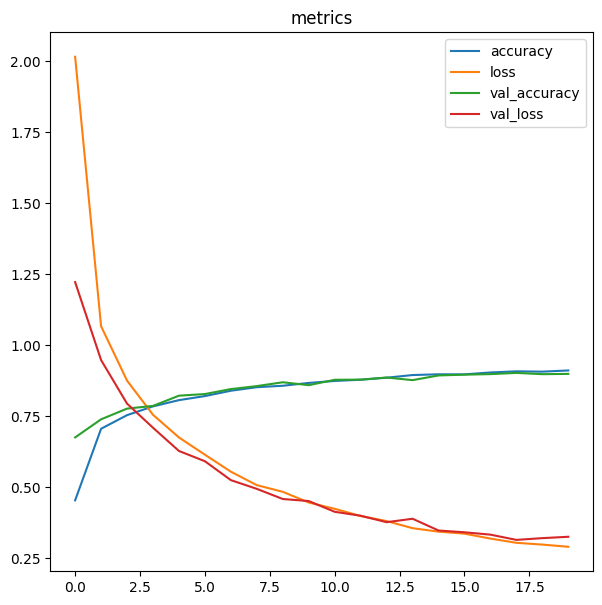

In [ ]:
pd.DataFrame(history.history).plot(figsize=(7, 7))
plt.title('metrics')
plt.show()

In [ ]:
# Step 5: Evaluate & Confusion Matrix
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[145,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   3,   0,   0,   0,   0,   0,   1,   0,   0],
       [  1, 133,   0,   7,   0,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   5,   4,   0,   0,   1,   0,   1,   0,   0],
       [  0,   0, 120,   0,   4,   0,   1,   1,   0,   0,   0,   1,   0,
          0,   4,   0,   0,   0,   0,   0,   4,   1,   0,   0,   1,   0],
       [  2,   0,   0, 147,   0,   1,   0,   2,   1,   0,   2,   0,   0,
          0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1,   0, 122,   0,   2,   1,   0,   0,   0,   2,   0,
          0,   0,   0,   0,   1,   1,   1,   0,   0,   0,   7,   0,   3],
       [  0,   2,   0,   0,   2, 128,   0,   0,   1,   0,   0,   0,   0,
          0,   0,   0,   0,   2,   2,   3,   0,   0,   0,   0,   0,   0],
       [  0,   1,   5,   1,   4,   1, 136,   0,   0,   0,   3,   1,   0,
          0,   0,   0,   1,   1,   0,   0,   

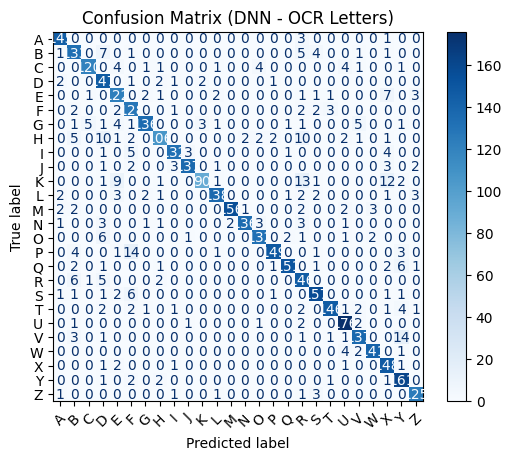

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.binary, xticks_rotation=90, values_format='d', ax=ax)
plt.title("Confusion Matrix (DNN - OCR letters)", fontsize=18)
plt.tight_layout()
plt.show()